# Equations for rectangular components



...

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cmath
import math
#import cv2

In [2]:
# Generando Matriz

plt.rcParams['image.cmap'] = 'gray'
sigma_xx = np.zeros((513, 513),dtype='float')
sigma_yy = np.zeros((513, 513),dtype='float')
tau_xy = np.zeros((513, 513),dtype='float')

In [3]:
# Constantes

P = 2000 # Compresion de la Carga - Constante de Franja
T = 10*10**-3 # Grosor
#P = 350 # Compresion de la Carga
R = 25*10**-3  # Radio
D = 217.3*10**-12
C = 4.5*10**-12
#D = 2*R # Diametro

In [4]:
# Genera valores para el radio

xc = np.linspace(-1*R, R, num=514)
yc = xc
xx,yy = np.meshgrid(xc,yc)

In [5]:
# Crea sigma_xx, sigma_yy, tau_xy
Factor = (((2*P)/(np.pi*T)))

for j in range(513):
    for k in range(513):
        
        x = xx.item((j,k))
        y = yy.item((j,k))
        
        den1 = ((x**2) + ((R - y)**2))**2
        den2 = ((x**2) + ((R + y)**2))**2
        
        r = (x**2+y**2)**0.5
        
        if r <= R :
            
            sigma_xx[j,k] = -1*Factor*((((R - y)*(x**2))/(den1)) + (((R + y)*(x**2))/(den2)) - (1/(2*R)) )
            sigma_yy[j,k] = -1*Factor*( (((R - y)**3)/(den1)) + (((R + y)**3)/(den2)) - (1/(2*R)) )
            tau_xy[j,k] = Factor*( ((((R - y)**2)*x)/(den1)) - ((((R + y)**2)*x)/(den2)) )
        
        else:
            tau_xy[j,k] = 0
            sigma_xx[j,k] = 0
            sigma_xx[j,k] = 0

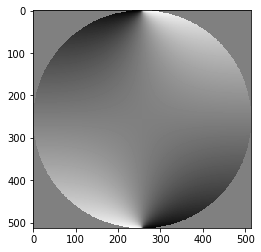

In [6]:
# isoclinico

isoclin = (0.5*np.arctan2((2*tau_xy),(sigma_xx-sigma_yy)))*(-1)
plt.imshow(isoclin)

In [7]:
# Sigma 1,2

sigma_1 = ((sigma_xx + sigma_yy)/2) + np.sqrt((((sigma_xx - sigma_yy)/2)**2) + (tau_xy)**2)     
sigma_2 = ((sigma_xx + sigma_yy)/2) - np.sqrt((((sigma_xx - sigma_yy)/2)**2) + (tau_xy)**2)

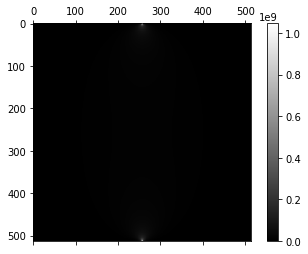

In [8]:
im = sigma_1-sigma_2
fig,ax = plt.subplots()
im = ax.matshow(im)
fig.colorbar(im)

## Response light source-light source, to generate color images



...

In [9]:
# Importa datos de fuentes de iluminacion y datos de sensores para iluminacion

sources = pd.ExcelFile('LightSources.xls')
sheets = sources.sheet_names
print(sheets)

sheet_2 = sources.parse('Sheet3')
#print(sheet_2)

sensor = pd.ExcelFile('Sensors.xls')
hojas = sensor.sheet_names
print(hojas)

hoja_1 = sensor.parse('Sheet4_4')
#filas = hoja_1.iloc[0:5]
#columnas = hoja_1.iloc[:,0:2]
#print(hoja_1)

# Separa datos de sensor por columnas

sensor_col_1 = hoja_1.iloc[:,0:1]
sensor_col1 = np.asarray(sensor_col_1)

sensor_col_2 = hoja_1.iloc[:,1:2]
sensor_col2 = np.asarray(sensor_col_2)

sensor_col_3 = hoja_1.iloc[:,2:3]
sensor_col3 = np.asarray(sensor_col_3)
     
sheet2 = np.asarray(sheet_2)

# Multiplica datos de sensor con datos de una fuente de iluminacion

interactions_1 = (sensor_col1*sheet2)
interactions_2 = (sensor_col2*sheet2)
interactions_3 = (sensor_col3*sheet2)

print(interactions_3[360])

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5', 'Sheet6', 'Sheet7', 'Sheet8', 'Sheet9', 'Sheet10', 'Sheet11']
['Sheet1_1', 'Sheet2_2', 'Sheet3_3', 'Sheet4_4', 'Sheet5_5', 'Sheet6_6', 'Sheet7_7', 'Sheet8_8', 'Sheet9_9', 'Sheet10_10', 'Sheet11_11']
[0.00026229]


In [10]:
# Lambdas

lambdas = []
i=390
for i in range (390, 760):
    #lambdas.append(i*10**-9)
    lambdas.append(i*10**-9)
    #cont = cont+1
    
print(len(lambdas))

370


In [ ]:
# Crea canales para la imagen a color RGB
# Cada canal tiene 371 matrices de profundidad

canal_R_I1 = np.zeros((513,513,370))
canal_G_I1 = np.zeros((513,513,370))
canal_B_I1 = np.zeros((513,513,370))

canal_R_I2 = np.zeros((513,513,370))
canal_G_I2 = np.zeros((513,513,370))
canal_B_I2 = np.zeros((513,513,370))

In [53]:
# Crea canales para la imagen a color RGB
# Cada canal tiene 371 matrices de profundidad

canal_R_I3 = np.zeros((513,513,370))
canal_G_I3 = np.zeros((513,513,370))
canal_B_I3 = np.zeros((513,513,370))

canal_R_I4 = np.zeros((513,513,370))
canal_G_I4 = np.zeros((513,513,370))
canal_B_I4 = np.zeros((513,513,370))

In [54]:
# Crea canales para la imagen a color RGB
# Cada canal tiene 371 matrices de profundidad

canal_R_I5 = np.zeros((513,513,370))
canal_G_I5 = np.zeros((513,513,370))
canal_B_I5 = np.zeros((513,513,370))

canal_R_I6 = np.zeros((513,513,370))
canal_G_I6 = np.zeros((513,513,370))
canal_B_I6 = np.zeros((513,513,370))

In [55]:
# Crea 370 canales  en cada canal por la intreacion del color-fuente de luz-fuente de iluminacion
for i in range(370):
    
    phase = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lambdas[i])
  
    canal_R_I1[:,:,i] = 0.5 * (interactions_1[i]) * (1+np.cos(phase))
    canal_G_I1[:,:,i] = 0.5 * (interactions_2[i]) * (1+np.cos(phase))
    canal_B_I1[:,:,i] = 0.5 * (interactions_3[i]) * (1+np.cos(phase))

In [56]:
# Crea 370 canales  en cada canal por la intreacion del color-fuente de luz-fuente de iluminacion
for i in range(370):
    
    phase = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lambdas[i])
  
    canal_R_I2[:,:,i] = 0.5 * (interactions_1[i]) * (1-np.cos(phase))
    canal_G_I2[:,:,i] = 0.5 * (interactions_2[i]) * (1-np.cos(phase))
    canal_B_I2[:,:,i] = 0.5 * (interactions_3[i]) * (1-np.cos(phase))

In [57]:
# Crea 370 canales  en cada canal por la intreacion del color-fuente de luz-fuente de iluminacion
for i in range(370):
    
    phase = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lambdas[i])
  
    canal_R_I3[:,:,i] = 0.5 * (interactions_1[i]) * (1-np.sin(phase)*np.sin(2*isoclin))
    canal_G_I3[:,:,i] = 0.5 * (interactions_2[i]) * (1-np.sin(phase)*np.sin(2*isoclin))
    canal_B_I3[:,:,i] = 0.5 * (interactions_3[i]) * (1-np.sin(phase)*np.sin(2*isoclin))

In [58]:
# Crea 370 canales  en cada canal por la intreacion del color-fuente de luz-fuente de iluminacion
for i in range(370):
    
    phase = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lambdas[i])
    
    canal_R_I4[:,:,i] = 0.5 * (interactions_1[i]) * (1+np.sin(phase)*np.cos(2*isoclin))
    canal_G_I4[:,:,i] = 0.5 * (interactions_2[i]) * (1+np.sin(phase)*np.cos(2*isoclin))
    canal_B_I4[:,:,i] = 0.5 * (interactions_3[i]) * (1+np.sin(phase)*np.cos(2*isoclin))

In [59]:
# Crea 370 canales  en cada canal por la intreacion del color-fuente de luz-fuente de iluminacion
for i in range(370):
    
    phase = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lambdas[i])
    
    canal_R_I5[:,:,i] = 0.5 * (interactions_1[i]) * (1+np.sin(phase)*np.sin(2*isoclin))
    canal_G_I5[:,:,i] = 0.5 * (interactions_2[i]) * (1+np.sin(phase)*np.sin(2*isoclin))
    canal_B_I5[:,:,i] = 0.5 * (interactions_3[i]) * (1+np.sin(phase)*np.sin(2*isoclin))

In [60]:
# Crea 370 canales  en cada canal por la intreacion del color-fuente de luz-fuente de iluminacion
for i in range(370):
    
    phase = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lambdas[i])
  
    canal_R_I6[:,:,i] = 0.5 * (interactions_1[i]) * (1-np.sin(phase)*np.cos(2*isoclin))
    canal_G_I6[:,:,i] = 0.5 * (interactions_2[i]) * (1-np.sin(phase)*np.cos(2*isoclin))
    canal_B_I6[:,:,i] = 0.5 * (interactions_3[i]) * (1-np.sin(phase)*np.cos(2*isoclin))

In [ ]:
# Suma las 317 matrices de profundidad para quedar con una sola matriz por cada color

canal_R_I1 = np.sum(canal_R_I1, axis=-1) 
canal_G_I1 = np.sum(canal_G_I1, axis=-1)
canal_B_I1 = np.sum(canal_B_I1, axis=-1)

canal_R_I2 = np.sum(canal_R_I2, axis=-1) 
canal_G_I2 = np.sum(canal_G_I2, axis=-1)
canal_B_I2 = np.sum(canal_B_I2, axis=-1)

In [62]:
# Suma las 317 matrices de profundidad para quedar con una sola matriz por cada color

canal_R_I3 = np.sum(canal_R_I3, axis=-1) 
canal_G_I3 = np.sum(canal_G_I3, axis=-1)
canal_B_I3 = np.sum(canal_B_I3, axis=-1)

canal_R_I4 = np.sum(canal_R_I4, axis=-1) 
canal_G_I4 = np.sum(canal_G_I4, axis=-1)
canal_B_I4 = np.sum(canal_B_I4, axis=-1)

In [63]:
# Suma las 317 matrices de profundidad para quedar con una sola matriz por cada color

canal_R_I5 = np.sum(canal_R_I5, axis=-1) 
canal_G_I5 = np.sum(canal_G_I5, axis=-1)
canal_B_I5 = np.sum(canal_B_I5, axis=-1)

canal_R_I6 = np.sum(canal_R_I6, axis=-1) 
canal_G_I6 = np.sum(canal_G_I6, axis=-1)
canal_B_I6 = np.sum(canal_B_I6, axis=-1)

## Normalizes color images, with respect to all the components of the 18 RGB channels


...

In [64]:
max_all_chanel = np.zeros((513,513,18))

max_all_chanel = np.concatenate([[canal_R_I1],[canal_G_I1],[canal_B_I1],[canal_R_I2],[canal_G_I2],[canal_B_I2],
                           [canal_R_I3],[canal_G_I3],[canal_B_I3],[canal_R_I4],[canal_G_I4],[canal_B_I4],
                           [canal_R_I5],[canal_G_I5],[canal_B_I5],[canal_R_I6],[canal_G_I6],[canal_B_I6]])

In [65]:
print(max_all_chanel.shape)

(18, 513, 513)


In [66]:
mxx_1 = np.max(max_all_chanel)
max_all_chanel = max_all_chanel*255/mxx_1

print(mxx_1)

24.61828147954785


In [67]:
canal_R_I1 = canal_R_I1*255/mxx_1
canal_G_I1 = canal_G_I1*255/mxx_1
canal_B_I1 = canal_B_I1*255/mxx_1

canal_R_I2 = canal_R_I2*255/mxx_1
canal_G_I2 = canal_G_I2*255/mxx_1
canal_B_I2 = canal_B_I2*255/mxx_1

canal_R_I3 = canal_R_I3*255/mxx_1
canal_G_I3 = canal_G_I3*255/mxx_1
canal_B_I3 = canal_B_I3*255/mxx_1

canal_R_I4 = canal_R_I4*255/mxx_1
canal_G_I4 = canal_G_I4*255/mxx_1
canal_B_I4 = canal_B_I4*255/mxx_1

canal_R_I5 = canal_R_I5*255/mxx_1
canal_G_I5 = canal_G_I5*255/mxx_1
canal_B_I5 = canal_B_I5*255/mxx_1

canal_R_I6 = canal_R_I6*255/mxx_1
canal_G_I6 = canal_G_I6*255/mxx_1
canal_B_I6 = canal_B_I6*255/mxx_1

In [68]:
image_1 = np.zeros((513,513,3))
#plt.subplots(figsize=(10, 4))

image_1[:,:,0] = canal_R_I1
image_1[:,:,1] = canal_G_I1
image_1[:,:,2] = canal_B_I1

image_1 = np.array(image_1, dtype = 'uint8')
#plt.imshow(image_1)
#plt.show

#**************************************************************

image_2 = np.zeros((513,513,3))
#plt.subplots(figsize=(10, 4))

image_2[:,:,0] = canal_R_I2
image_2[:,:,1] = canal_G_I2
image_2[:,:,2] = canal_B_I2

image_2 = np.array(image_2, dtype = 'uint8')
#plt.imshow(image_2)
#plt.show

#***************************************************************

image_3 = np.zeros((513,513,3))
#plt.subplots(figsize=(10, 4))

image_3[:,:,0] = canal_R_I3
image_3[:,:,1] = canal_G_I3
image_3[:,:,2] = canal_B_I3

image_3 = np.array(image_3, dtype = 'uint8')
#plt.imshow(image_3)
#plt.show

#****************************************************************

image_4 = np.zeros((513,513,3))
#plt.subplots(figsize=(10, 4))

image_4[:,:,0] = canal_R_I4
image_4[:,:,1] = canal_G_I4
image_4[:,:,2] = canal_B_I4

image_4 = np.array(image_4, dtype = 'uint8')
#plt.imshow(image_4)
#plt.show

#****************************************************************

image_5 = np.zeros((513,513,3))
#plt.subplots(figsize=(10, 4))

image_5[:,:,0] = canal_R_I5
image_5[:,:,1] = canal_G_I5
image_5[:,:,2] = canal_B_I5

image_5 = np.array(image_5, dtype = 'uint8')
#plt.imshow(image_5)
#plt.show

#******************************************************************

image_6 = np.zeros((513,513,3))
#plt.subplots(figsize=(10, 4))

image_6[:,:,0] = canal_R_I6
image_6[:,:,1] = canal_G_I6
image_6[:,:,2] = canal_B_I6

image_6 = np.array(image_6, dtype = 'uint8')
#plt.imshow(image_6)
#plt.show

(513, 513, 3)


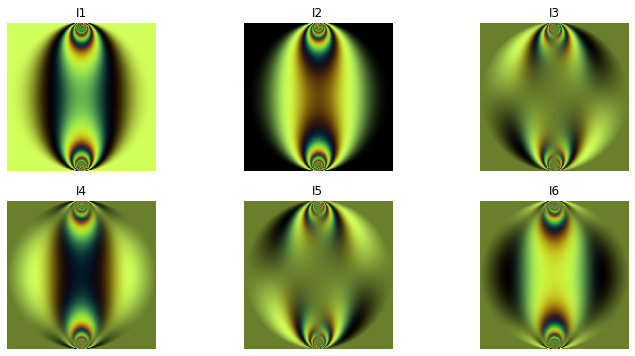

In [69]:

plt.subplots(figsize=(12, 6))

plt.subplot(231)
print(image_1.shape)
plt.title("I1")
plt.axis("off")
plt.imshow(image_1)

plt.subplot(232)
plt.title("I2")
plt.axis("off")
plt.imshow(image_2)

plt.subplot(233)
plt.title("I3")
plt.axis("off")
plt.imshow(image_3)

plt.subplot(234)
plt.title("I4")
plt.axis("off")
plt.imshow(image_4)

plt.subplot(235)
plt.title("I5")
plt.axis("off")
plt.imshow(image_5)

plt.subplot(236)
plt.title("I6")
plt.axis("off")
plt.imshow(image_6)
plt.show()